# **Information Gain of Twitter ‘Social Spambots’**
## By: Jason Weidner & Joaquin Quintana

## **Directory setup for this script**
I suggest we store the unzipped data to a directory that is one level above the git repo, and in a folder called 'data'. That way the data won't be included in our git repository and we can easily reference the same path in this notebook. It'll just mean that each of us need to move the data into the same relative path on our local machine.

Makes sense. I started to place the functions into the notebook following this structure. I downloaded the image of the file structure and placed it in the folder containing this notebook so it can be run and visualized prior to changing directories. 

Something to consider is using a statistical package like sklearn or should we code all the functions our selves? If we use a package maybe use Patsy for matrix methods. 

In [1]:
from IPython.display import Image
from zipfile import ZipFile
import os

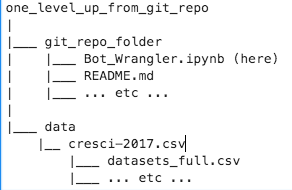

In [2]:
#Here's an example of the folder structure I described:
#placed image in folder with this python notebook for user to run and see prior to opening any files
Image(filename = 'Folder Structure Bot_Wrangler.png')

# **Display image of folder structure.**

## Here's an example of the folder structure I described:
#placed image in folder with this python notebook for user to run and see prior to opening any files
Image(filename = 'Folder Structure Bot_Wrangler.png')

## **Begin Function Defintions for Notebook**

In [4]:
#Template for function defintions
def navigator():
    """ Returns the information gain of attr_col in the dataframe df.
    
    Parameters:
        attr_col (N/A): Navigates from the directory containing the python notebook up one leve to the 
        folder 'Data' which contains the zip file containing the raw data. Simply run the function after 
        folders are in aforementioned stucture with the folder containg the datanamed as 'Data'. This folder 
        should be one level up from the folder containing this notebook.
        
    
    Returns: 
        (string): Prints the working directory. The specified folder is changed to the current working 
        directory.
        
    Note:
        - This function will change the working directory and keep the notebook on the path to the data
        folder. Allows for the notebook to access the data file remotly. 
    """
    path_parent = os.path.dirname(os.getcwd()) # get directory notebook 
    
    # move up one level and find folder Data 
    f = os.path.join(os.path.expanduser('~'),path_parent,'Data')
    
    #change working directory to Data folder to start unzipping files
    os.chdir(f)
    return(f)

In [5]:
#call navigator to find data folder and change path to this locations which holds the raw zip file
navigator() 

'/Users/JQ/Documents/Data Mine/Bots Project/Data'

In [6]:
def unzip_all_zips(Zip_File_Name):
    """ Opens all zipfolders in the working directory the subsequent subdirectories. 
    
    Parameters:
        attr_col (string): input zip folder's name as a string. For example, 'folderName.zip'
    
    Returns: 
        (string): Print Done! When finished opening files.
        
    Note:
        - This function will open all folders with ext .zip. 
        Warning! - function will overwrite all data with identical folder names 
    """
    # specifying the zip file name 
    folder = Zip_File_Name 
    
    # opening the zip file in READ mode 
    with ZipFile(folder, 'r') as zip:
        zip.extractall() 

    #navigate into subdirectory
    os.chdir('datasets_full.csv')
    path = os.getcwd()
    
    #get all files in subdirectory 
    all_files = os.listdir('.')
    all_zip_files = [file for file in all_files if file.endswith('.zip')] # find only the zip files
    
    #open all identified zip files in subdriectory
    for file in all_zip_files:
        with ZipFile(file, 'r') as zip: 
            zip.extractall() 
            
    return("Done!")

In [7]:
unzip_all_zips('cresci-2017.csv.zip')

'Done!'

In [ ]:
def remove_ext_from_folders_with_csv_ext(Folder_Name_Containing_Folders_With_CSV_ext):
    """ Function removes typos from folders which specify folders as files with specific 
            file extensions. The file extensions on the folder prevents OS walk from finding 
            the correct files on a given path.
    
    Parameters:
        attr_col (string): input folder as a string containing folders name . For example, 'datasets_full.csv'
    
    Returns: 
        (string): Print Done! When finished opening files.
        
    Note:
        - 
    """
    #remove all extensions from folders which contain csv extensions
    path = os.path.abspath(path) #current working directory
    for filename in glob.iglob(os.path.join(path, '*.csv')):
    os.rename(filename, filename[:-4] + '')
    return 

In [ ]:
def remove_NaNs(Pandas_DataFrame):
    """ Function take as Pandas DataFrame and removes all columns which are NaN. 
    
    Parameters: 
        attr_col (Pandas DataFrame): input pandas DataFrame 
        
    Returns: 
         (Pandas DataFrame): return Dataframe with all NaN columns removed.       
        
    Note: 
         
    """
    
    return Pandas_DataFrame.dropna(axis='columns')

In [10]:
def get_columns_csv(csv_fileName, list_of_columns):   
    """ Function reads the csv_fileName of interest and pulls the requested columns from the file. 
    All columns requested are placed into a new Pandas DataFrame and returned with a name specified by the user. 
     
    
    Parameters: 
        attr_col (string): string of fileName, a list of strings containing requested columns and name for output DataFrame.
        
    Returns: 
         (Pandas DataFrame): return a new Pandas DataFrame with specified name. The new Dataframe contains the columns requested.    
        
    Note: 
         
    """
    return

In [2]:
def Info_Gain_Attribute(attr_col, bot_flag_col, df):
    """ Returns the information gain of attr_col in the dataframe df.
    
    Parameters:
        attr_col (String): The name of the column we want to use for calculating information gain
        bot_flag_col (String): The name of the column for bot_status (i.e. authentic user or bot)
        df (DataFrame): Df containing all the data
        
    
    Returns: 
        (np.float64): The information gain of attr_col in df.
        
    Note:
        - This function will call Info_gain_dataset in order to calculate info_gain_attribute.
    """
    return

In [ ]:
def create_30_follower_flag(fn):
    """  """
    return

In [11]:
#Template for function defintions
def Info_Gain_Dataset(attr_col, bot_flag_col, df):
    """ Returns the information gain of attr_col in the dataframe df.
    
    Parameters:
        attr_col (String): The name of the column we want to use for calculating information gain
        bot_flag_col (String): The name of the column for bot_status (i.e. authentic user or bot)
        df (DataFrame): Df containing all the data
        
    
    Returns: 
        (np.float64): The information gain of attr_col in df.
        
    Note:
        - This function will call Info_gain_dataset in order to calculate info_gain_attribute.
    """
    return

In [10]:
#
def Info_Gain_Attribute(attr_col, bot_flag_col, df):
    """ Returns the information gain of attr_col in the dataframe df.
    
    Parameters:
        attr_col (String): The name of the column we want to use for calculating information gain
        bot_flag_col (String): The name of the column for bot_status (i.e. authentic user or bot)
        df (DataFrame): Df containing all the data
        
    
    Returns: 
        (np.float64): The information gain of attr_col in df.
        
    Note:
        - This function will call Info_gain_dataset in order to calculate info_gain_attribute.
    """
    return(0)

In [ ]:
def create_col_has_over_30_followers(df):
    """Creates a df with two columns: usid and if the user have over 30 followers.
    
    Parameters:
        df (pd.df): a dataframe with at least two columns: "usid" and "follower count"
        
    Returns:
        df (pd.df): a dataframe with two columns: "usid" and a boolean value for if follower count > 30.
    """
    return 

In [ ]:
def create_col_has_over_100_followers(df):
    """Creates a df with two columns: usid and if the user have over 100 followers.
    
    Parameters:
        df (pd.df): a dataframe with at least two columns: "usid" and "follower count"
        
    Returns:
        df (pd.df): a dataframe with two columns: "usid" and a boolean value for if follower count > 100.
    """
    return 

In [ ]:
def create_col_user_follows_over_30_people(df):
    """Creates a df with two columns: usid and if the user follows over 30 other accounts.
    
    Parameters:
        df (pd.df): a dataframe with at least two columns: "usid" and "following count"
        
    Returns:
        df (pd.df): a dataframe with two columns: "usid" and a boolean value for if following count > 30.
    """
    return 

In [ ]:
def create_col_user_follows_over_100_people(df):
    """Creates a df with two columns: usid and if the user follows over 100 other accounts.
    
    Parameters:
        df (pd.df): a dataframe with at least two columns: "usid" and "following count"
        
    Returns:
        df (pd.df): a dataframe with two columns: "usid" and a boolean value for if following count > 100.
    """
    return 

In [ ]:
def create_col_user_authored_over_50_tweets(df):
    """Creates a df with two columns: usid and if the user authored over 50 tweets.
    
    Parameters:
        df (pd.df): a dataframe with at least two columns: "usid" and "tweets"
        
    Returns:
        df (pd.df): a dataframe with two columns: "usid" and a boolean value for if user has authored >50 tweets.
    """
    return 

In [ ]:
def create_col_user_authored_over_100_tweets(df):
    """Creates a df with two columns: usid and if the user authored over 100 tweets.
    
    Parameters:
        df (pd.df): a dataframe with at least two columns: "usid" and "tweets"
        
    Returns:
        df (pd.df): a dataframe with two columns: "usid" and a boolean value for if user has authored >100 tweets.
    """
    return 

In [1]:
def create_col_has_default_image_in_profile(df):
    """Creates a df with two columns: usid and default_profile.
    
    Parameters:
        df (pd.df): a dataframe with at least two columns: "usid" and "default_profile"
        
    Returns:
        df (pd.df): a dataframe with two columns: "usid" and a boolean value for if user has a default_profile.
        
    Note: See https://developer.twitter.com/en/docs/twitter-api/v1/data-dictionary/object-model/user for a description of the default_profile attribute.
    """
    return 

In [ ]:
def create_col_friends_div_followers2(df):
    """Creates a df with two columns: usid and (num friends) / (num followers^2).
    
    Parameters:
        df (pd.df): a dataframe with at least two columns: "usid" and "friends", "followers"
        
    Returns:
        df (pd.df): a dataframe with two columns: "usid" and a float (num friends) / (num followers^2).
    """
    return 

## **Start Data Processing**

In [9]:
all_files = os.listdir('.')#get all files in current directory 
#all_files
all_csv_files = [file for file in all_files if file.endswith('.csv')] # find only the csv files
all_csv_files

['traditional_spambots_4.csv',
 'genuine_accounts.csv',
 'crowdflower_results.csv',
 'traditional_spambots_3.csv',
 'traditional_spambots_2.csv',
 'traditional_spambots_1.csv',
 'social_spambots_2.csv',
 'fake_followers.csv',
 'social_spambots_3.csv',
 'social_spambots_1.csv']

In [8]:
list_of_dataframes = []
for file in all_csv_files:
    #print(file)
    list_of_dataframes.append(pd.read_csv(file))
list_of_dataframes[0]

NameError: name 'all_csv_files' is not defined

In [12]:
df.columns

Index(['id', 'text', 'source', 'user_id', 'truncated', 'in_reply_to_status_id',
       'in_reply_to_user_id', 'in_reply_to_screen_name', 'retweeted_status_id',
       'geo', 'place', 'contributors', 'retweet_count', 'reply_count',
       'favorite_count', 'favorited', 'retweeted', 'possibly_sensitive',
       'num_hashtags', 'num_urls', 'num_mentions', 'created_at', 'timestamp',
       'crawled_at', 'updated'],
      dtype='object')